In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-climate-risk-index-and-related-economic-l/climate-risk-index-1.csv
/kaggle/input/global-climate-risk-index-and-related-economic-l/resource_links.md


In [2]:
climate="/kaggle/input/global-climate-risk-index-and-related-economic-l/climate-risk-index-1.csv"
df=pd.read_csv(climate,index_col="index")

In [3]:
df.head()

,cartodb_id,the_geom,the_geom_webmercator,country,cri_rank,cri_score,fatalities_per_100k_rank,fatalities_per_100k_total,fatalities_rank,fatalities_total,losses_per_gdp__rank,losses_per_gdp__total,losses_usdm_ppp_rank,losses_usdm_ppp_total,rw_country_code,rw_country_name
index,,,,,,,,,,,,,,,,
0,1,NaN,NaN,Saudi Arabia,79,72.50,18,0.45,18,140,131,0.0001,119,1.229,SAU,Saudi Arabia
1,2,NaN,NaN,Romania,61,61.50,112,0.01,102,1,16,0.6746,11,2797.884,ROU,Romania
2,3,NaN,NaN,Spain,69,66.33,74,0.05,47,22,86,0.0394,31,637.070,ESP,Spain
3,4,NaN,NaN,Slovenia,135,124.50,114,0.00,114,0,135,NaN,135,0.000,SVN,Slovenia
4,5,NaN,NaN,South Sudan,133,117.33,114,0.00,114,0,120,0.0021,122,0.508,SSD,South Sudan


In [4]:
df.columns

Index(['cartodb_id', 'the_geom', 'the_geom_webmercator', 'country', 'cri_rank',
       'cri_score', 'fatalities_per_100k_rank', 'fatalities_per_100k_total',
       'fatalities_rank', 'fatalities_total', 'losses_per_gdp__rank',
       'losses_per_gdp__total', 'losses_usdm_ppp_rank',
       'losses_usdm_ppp_total', 'rw_country_code', 'rw_country_name'],
      dtype='object')

In [5]:
df.isna().sum()

cartodb_id                     0
the_geom                     182
the_geom_webmercator         182
country                        0
cri_rank                       0
cri_score                      0
fatalities_per_100k_rank       0
fatalities_per_100k_total      0
fatalities_rank                0
fatalities_total               0
losses_per_gdp__rank           0
losses_per_gdp__total         51
losses_usdm_ppp_rank           0
losses_usdm_ppp_total          0
rw_country_code                3
rw_country_name                3
dtype: int64

In [6]:
df["cri_rank"]

index
0       79
1       61
2       69
3      135
4      133
      ... 
177    135
178    135
179    131
180    135
181    135
Name: cri_rank, Length: 182, dtype: int64

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='cri_score', ylabel='cri_rank'>

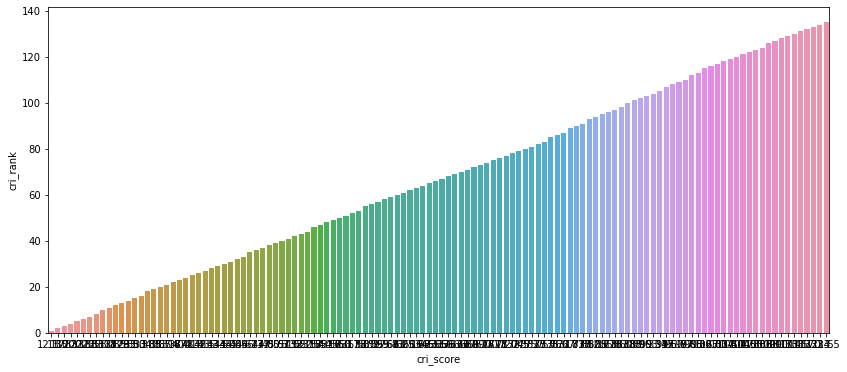

In [8]:
plt.figure(figsize=(14,6))
sns.barplot(x=df["cri_score"].sort_values(),y=df["cri_rank"])

In [9]:
def bar_plot(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)


climate score and climate rank bar plot are same

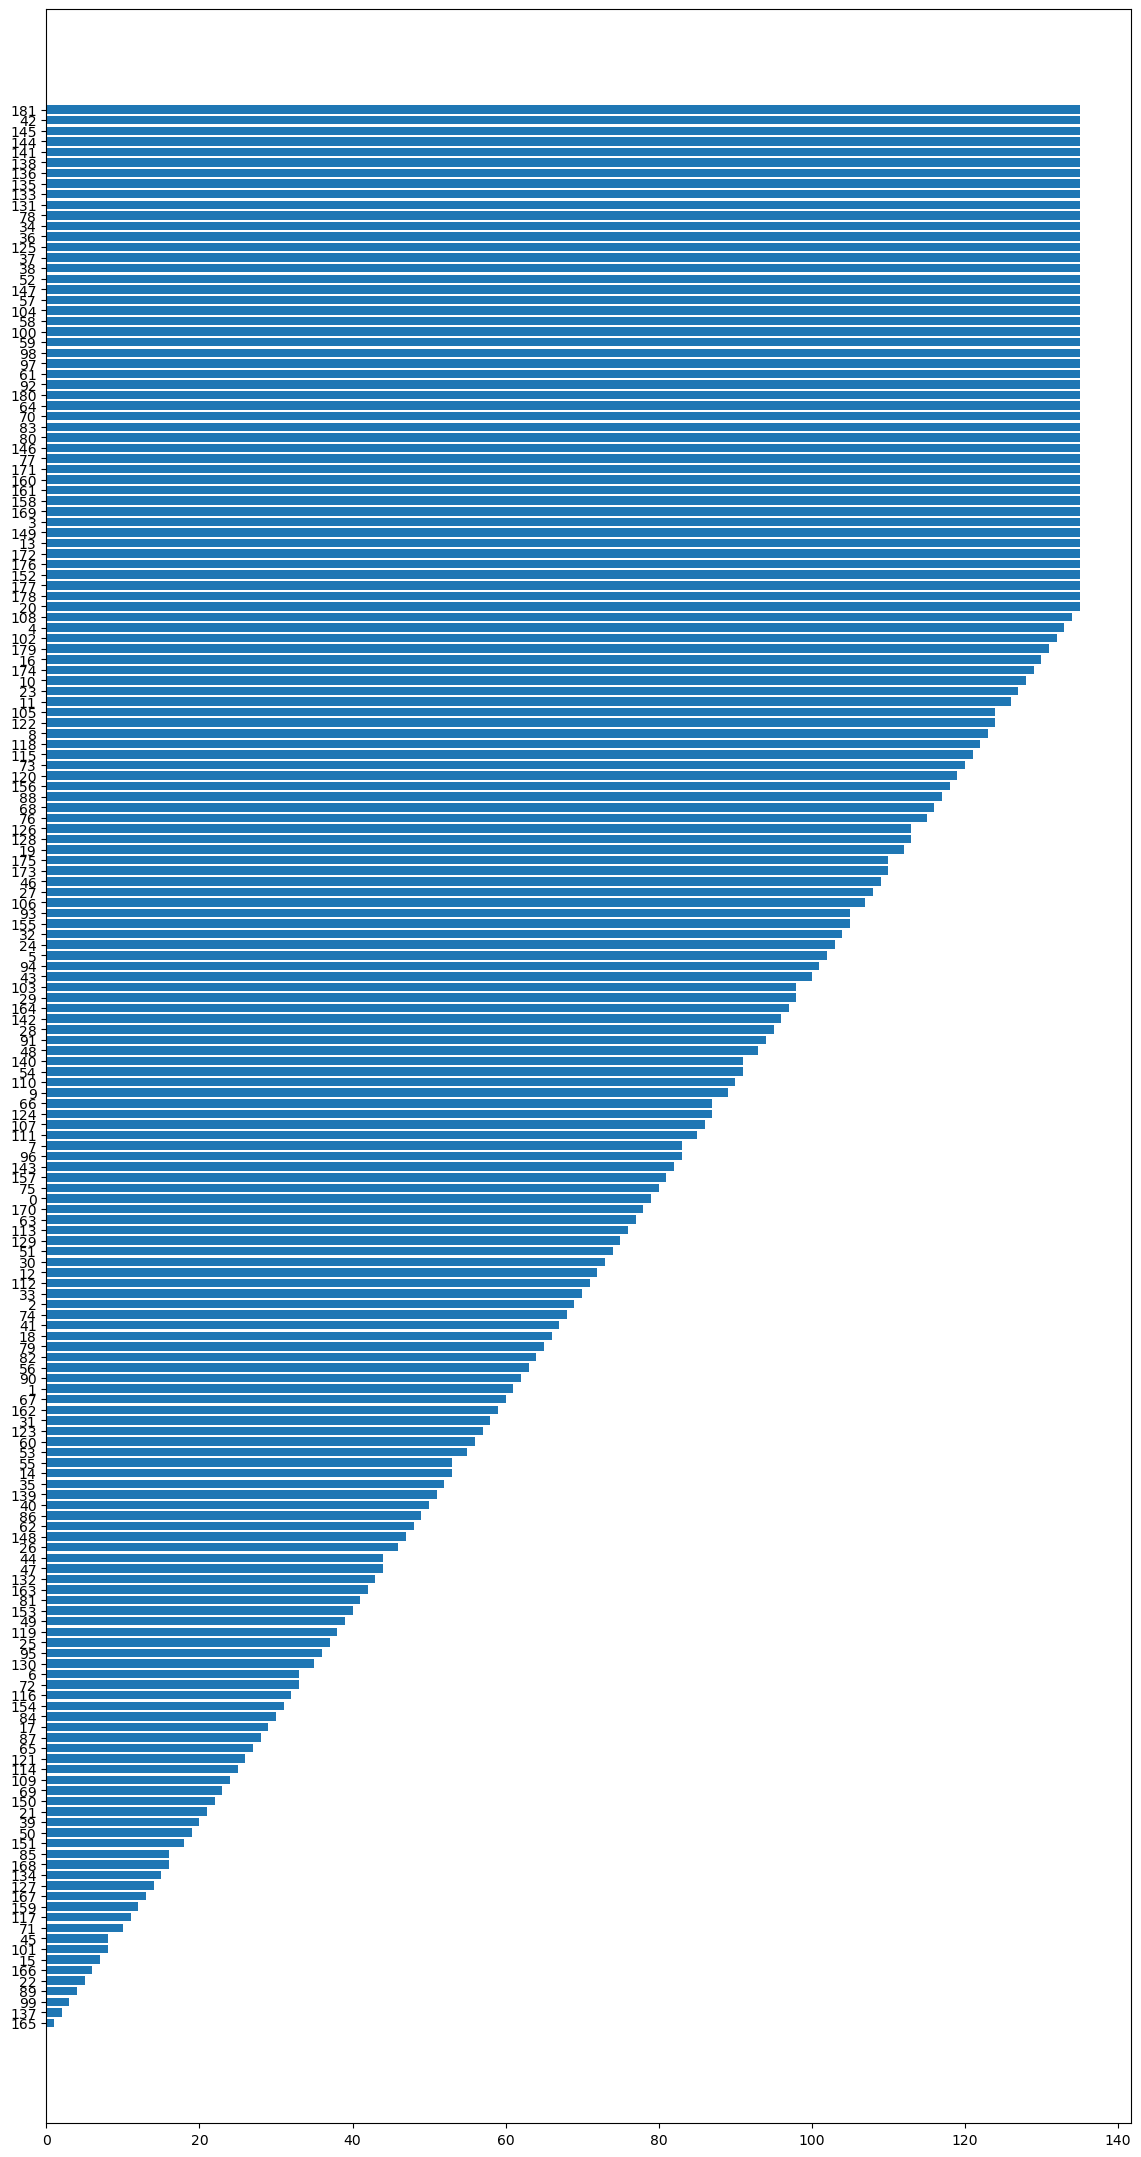

In [11]:
plt.figure(dpi=100, figsize=(14, 28))
bar_plot(df["cri_rank"])

Select the Pakistan Row

In [12]:
mark=df["country"]=="Pakistan"
row=df[mark]
row

,cartodb_id,the_geom,the_geom_webmercator,country,cri_rank,cri_score,fatalities_per_100k_rank,fatalities_per_100k_total,fatalities_rank,fatalities_total,losses_per_gdp__rank,losses_per_gdp__total,losses_usdm_ppp_rank,losses_usdm_ppp_total,rw_country_code,rw_country_name
index,,,,,,,,,,,,,,,,
117,118,NaN,NaN,Pakistan,11,28.17,11,0.88,3,1663,60,0.0974,24,907.122,PAK,Pakistan


In [ ]:
sns.lineplot(data=df["fatalities_per_100k_rank"])

In [ ]:
df["fatalities_per_100k_rank"]

<AxesSubplot:xlabel='fatalities_rank', ylabel='losses_per_gdp__rank'>

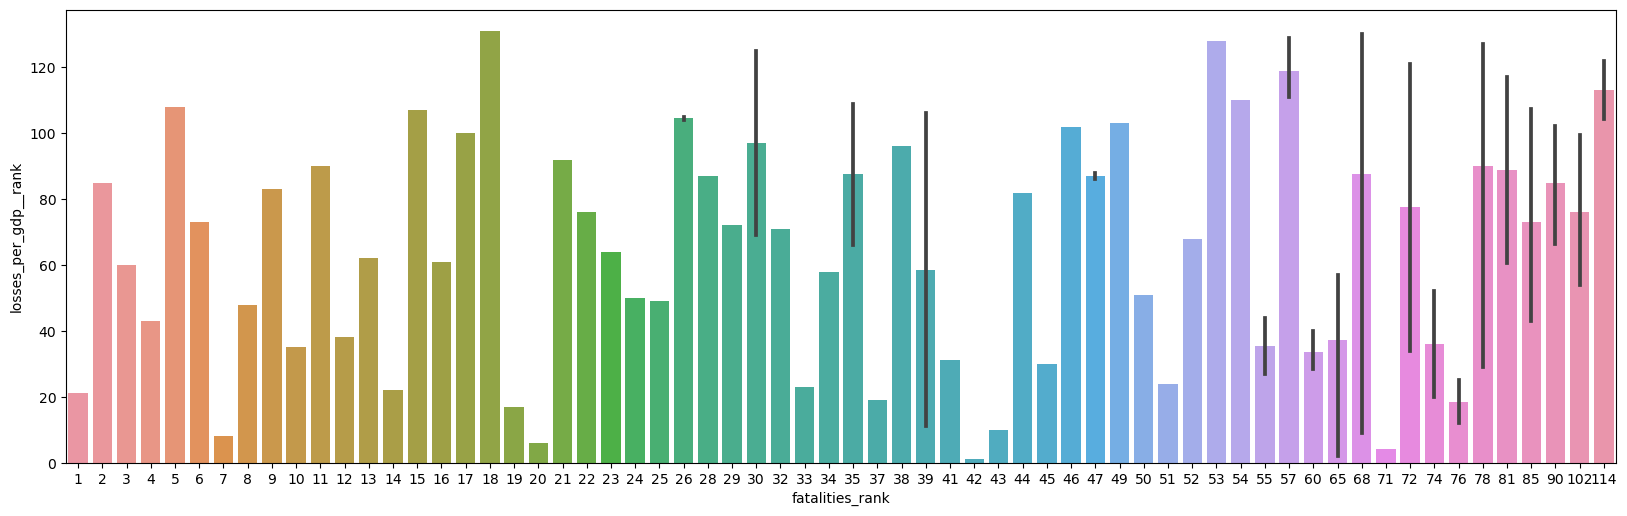

In [15]:
plt.figure(dpi=100, figsize=(20, 6))
sns.barplot(x=df["fatalities_rank"],y=df["losses_per_gdp__rank"])

<AxesSubplot:xlabel='index', ylabel='fatalities_rank'>

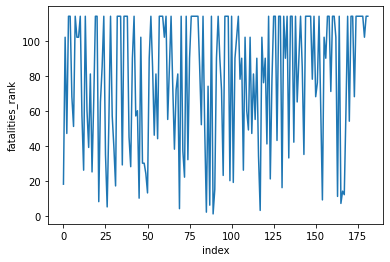

In [22]:
sns.lineplot(data=df["fatalities_rank"])